# Probability views 

![](https://i.imgur.com/gGHg0GV.png)

- See: https://drive.google.com/file/d/0B-dmEvN59Z2ZOF9US1RxcVRyQnc/view

# Discrete distributions

 
- Definition (Probability Mass Function (PMF))

    - For a discrete random variable $X$ with possible values $x_1, x_2, x_3, \cdots , x_n$, a probability mass function $f(x_i)$ is a function such that:
    
        1. $f(x_i) \geq 0$
        2. $\sum^n_{i=1} f(x_i) = 1$
        3. $f(x_i) = P(X = x_i)$


- Definition (CDF for a discrete random variable)

    - For a discrete random variable $X$, $F(x)$ satisfies the following properties:
        1. $F(x)=P(X \leq x) = \sum_{x_i \leq x} f(x_i)$
        2. $0 \leq F(x) \leq 1$
        3. If $x \leq y$, then $F(x) \leq F(y)$
    - The CDF is defined on the real number line.
    - The CDF is a non-decreasing function of $X$ (i.e. increases or stays constant as $x \to \infty $).


- Expected value and variance of a discrete random variable:

    - The expected value (also called the expectation or mean) of a discrete r.v. $X$ whose distinct possible values are $x_1, x_2, \dots$ is defined by
    $$
    \mu = E[X] = \sum_{i=1}^n x_i f(x_i).
    $$

    - The variance is defined as:
    $$
    \sigma^2 = E[(X − \mu)^2] = \sum_{i=1}^n (x_i - \mu)^2 f(x_i)
    $$
    

### Ejemplos de Variables Aleatorias Discretas
- V.A. X: Número de veces que se obtiene el número 6 al lanzar un dado N veces.
Valores puntuales de toma X: R(X) = {0,1,2,...N}
- V.A. X: El precio de cierta acción sube (si sube, X = 1, no sube X = 0). R(X) = {0,1}
- V.A. X: Número de días que transcurren desde el día en que se vence una obligación crediticia y el día en que se cumple con dicha obligación.
R(X) = {0,1,...,n,...}
- V.A. X: Número de créditos que un estudiante de P&E1 seleccionado al azar tiene inscritos este semestre
R(X) = {m, m+1,..., M}
- V.A. X: Número de hermanos que tiene un estudiante de P&E1 seleccionado al azar.
R(X) = {0,1,...,N}

### Ejemplo introductorio

Una de las variables relevantes en el desempeño de los cajeros automáticos de cierto
banco es el número de cajeros de la competencia situados en un radio de 500 metros a
la redonda del cajero.

De acuerdo con el análisis de información disponible al respecto, se sabe que la variable
aleatoria, $X$, que representa el número de cajeros de la competencia para un cajero
seleccionado al azar, tiene un rango, $R(X)$, donde $R(X) = \{0,1,2,3\}$ y se distribuye como:

| x        | Número de observaciones           |
| :-------------: |:-------------:|
| 0     | 4 | 
| 1      | 8      |
| 2 | 16      |
| 3 | 12      |

Tenemos que:

$$
f_X(x)=\left\{
                \begin{array}{ll}
                  0.1,\ x = 0 \\
                  0.2,\ x = 1 \\
                  0.4,\ x = 2 \\
                  0.3,\ x = 3 \\
                  0.0,\ \text{otherwise}
                \end{array}
              \right.
$$

Y 

$$
F(x)=\left\{
                \begin{array}{ll}
                  0.0,\ \text{if } x < 0 \\
                  0.1,\ 0 \leq x < 1 \\
                  0.3,\ 1 \leq x < 2  \\
                  0.7,\ 2 \leq x < 3  \\
                  1.0,\ x \geq 3  
                \end{array}
              \right.
$$

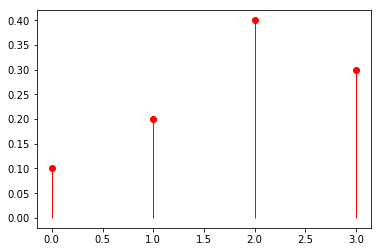

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

x = np.arange(0, 4)
pmfx = np.array([.1, .2, .4, .3])

def plot_pmf(x, pmfx):
    fig, ax = plt.subplots(1, 1)
    ax.vlines(x, 0, pmfx, colors='r', linestyles='-', lw=1)
    ax.plot(x, pmfx, 'ro', label='Pmf')
    plt.show()
    
plot_pmf(x, pmfx)

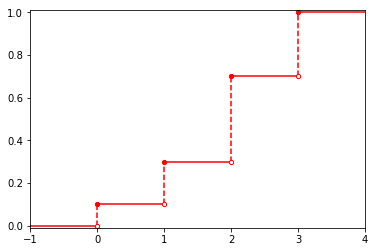

In [3]:
x = np.arange(-1, 5)  # Provide range +-1
cdfx = np.array([.1, .3, .7, 1.])  # CDF

def plot_cdf(rvs_range, cdf_prob):
    yn = np.insert(cdf_prob, 0, 0)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
    ax.hlines(y=yn, xmin=rvs_range[:-1], xmax=rvs_range[1:],
              color='red', zorder=1)

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
    ax.vlines(x=rvs_range[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
              linestyle='dashed', zorder=1)

    ax.scatter(rvs_range[1:-1], cdf_prob, color='red', s=18, zorder=2)
    ax.scatter(rvs_range[1:-1], yn[:-1], color='white', s=18, zorder=2,
               edgecolor='red')
    ax.grid(False)
    ax.set_xlim(rvs_range[0], rvs_range[-1])
    ax.set_ylim([-0.01, 1.01])
    plt.show()
    
plot_cdf(x, cdfx)

### Let's generate a rvs from the pmf above

- Calculate $E[X],\ Var[X]$ and contrast simulation with theoretical value

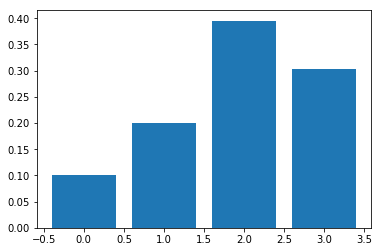

Simulated frequencies [ 0.101   0.2005  0.3953  0.3032]
E[X] = 1.9 
Var[X] = 0.89
Simulated:
Mean = 1.9007 
Var[X] = 0.89783951


In [4]:
cdf_atm = np.array([.1, .3, .7, 1.])  # CDF

def atm_around(u):
    # This is a roulette
    return np.where(cdf_atm > u)[0][0]

size = 10000

atms = [atm_around(np.random.rand()) for i in range(size)]

unique, counts = np.unique(atms, return_counts=True)
plt.bar(unique, counts / size)
plt.show()
print("Simulated frequencies", counts / size)

x = np.arange(0, 4)
px = np.array([.1, .2, .4, .3])
ex = sum(x*px)
vx = sum((x**2)*px) - ex**2
print("E[X] =", ex, "\nVar[X] =", vx)

print("Simulated:\nMean =", np.mean(atms), "\nVar[X] =", np.var(atms))

# Bernoulli distribution

$$
X \sim Bern(x; p)
$$

$$
g_X(x) = p^x (1-p)^{1-x},\ x \in \{0, 1\}
$$

$$
E[X] = p,\ Var[X] = p (1 - p)
$$

In [5]:
def bernoulli(p=0.5):
    """
    X ~ Bern(p)
    p: prob. de éxito
    Devuelve: x=1, con prob. p, 
              0 con prob. 1 - p
    """
    if np.random.rand() < p:
        return 1  # Exito
    else:
        return 0  # Fracaso
    

print([bernoulli(0.3) for i in range(10)])

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


# Binomial distribution

$$
X \sim Bin(x; n, p)
$$

$$
g_X(x) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}
$$

$$
E[X] = np,\ Var[X] = n p (1 - p)
$$

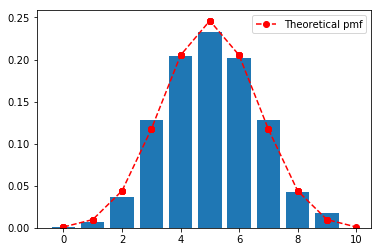

In [6]:
def binomial(n=1, p=0.5):
    x = 0
    for i in range(n):
        x = x + bernoulli(p)

    return x

n, p = 10, 0.5
size = 1000  # sequence length

RVS = [binomial(n, p) for i in range(size)]

unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

# ploting binomial polygon curve
from scipy.stats import binom
x = np.linspace(0, n, dtype='int')  # variable range
px = binom.pmf(x, n, p)
plt.plot(x, px, '--ro')
plt.legend(['Theoretical pmf'])

plt.show()

# Geometric distribution

$$
X \sim Geom(x; p)
$$

$$
g_X(x) = p (1-p)^{x},\ x \in \{0, 1, 2, \dots \}
$$

$$
E[X] = \frac{q}{p},\ Var[X] = \frac{q}{p^2},\ q = 1 - p
$$

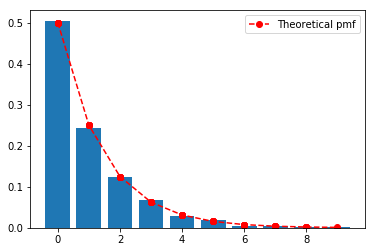

In [7]:
def geometric(p=0.5):
    x = 0
    while not bernoulli(p):
        x = x + 1

    return x

p = 0.5
size = 1000  # sequence length

RVS = [geometric(p) for i in range(size)]

unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

# ploting geometric polygon curve
from scipy.stats import geom
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = geom.pmf(x+1, p)
plt.plot(x, px, '--ro')
plt.legend(['Theoretical pmf'])

plt.show()

# Negative binomial

$$
X \sim NBin(x; r, p)
$$

$$
g_X(x) = {x + r - 1 \choose r - 1} p^r (1-p)^{x},\ x \in \{0, 1, 2, \dots\}
$$

$$
E[X] = \frac{pr}{1 - p},\ Var[X] = \frac{pr}{(1-p)^2}
$$

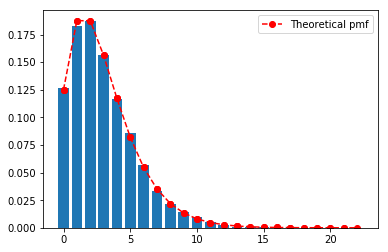

In [8]:
def nbin(r=1, p=0.5):
    x = 0
    for k in range(r):
        x = x + geometric(p)

    return x

r, p = 3, 0.5
size = 10000  # sequence length

RVS = [nbin(r, p) for i in range(size)]

unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

# ploting neg binomial polygon curve
from scipy.stats import nbinom
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = nbinom.pmf(x, r, p)
plt.plot(x, px, '--ro')
plt.legend(['Theoretical pmf'])

plt.show()

# Poisson distribution

$$
X \sim Poiss(x; \lambda)
$$

$$
g_X(x) = \frac{e^{-\lambda} \lambda^x}{x!},\ x \in \{0, 1, 2, \dots\}
$$

$$
E[X] = \lambda,\ Var[X] = \lambda
$$

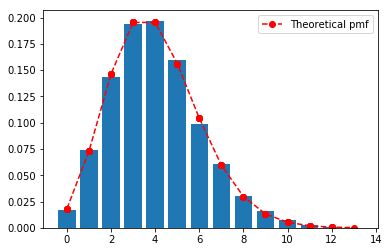

In [9]:
def poiss(lam):
    u = np.random.rand()
    cp = np.exp(-lam)
    k = 0
    factorial_k = 1
    while cp < u:
        k = k + 1
        factorial_k = factorial_k * k
        cp = cp + np.exp(-lam) * lam**k / factorial_k

    return k

lam = 4
size = 10000  # sequence length

RVS = [poiss(lam) for i in range(size)]

unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

# ploting poisson polygon curve
from scipy.stats import poisson
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = poisson.pmf(x, lam)
plt.plot(x, px, '--ro')
plt.legend(['Theoretical pmf'])

plt.show()

# Hypergeometric distribution

If we have an urn filled with $w$ white and $b$ black balls, 
then drawing $n$ balls out
of the urn with replacement yields a $Bin(n, w/(w + b))$ distribution 
for the number of white balls obtained in $n$ trials, 
since the draws are independent Bernoulli trials,
each with probability $w/(w+b)$ of success. 
If we instead sample without replacement,
then the number of white balls follows a 
**Hypergeometric distribution**.

**Hypergeometric story.** An urn contains $w = 6$ white balls and $b = 4$ black balls. We
sample $n = 5$ without replacement. The number $X$ of white balls in the sample is
Hypergeometric; here we observe $X = 3$.

![](https://i.imgur.com/jGp0QIZ.png)

Consider an urn with $w$ white balls and $b$ black balls. 
We draw $n$ balls out of the urn at random without replacement, 
such that all $\binom{w+b}{n}$ samples are equally likely.
Let $X$ be the number of white balls in the sample. 
Then $X$ is said to have the \textbf{Hypergeometric distribution} 
with parameters $w, b$, and $n$; we denote this by 
$X \sim \text{HGeom}(w, b, n),\
P(X=k)=\frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}}$.

- If $X \sim \text{HGeom}(K, N, n)$, then the PMF
of $X$ is
$$
P(X=k)=\frac{\dbinom{K}{k}\dbinom{N-K}{n-k}}{\dbinom{N}{n}}
$$
for integers $k$ satisfying $0 \leq k \leq K$ and
$0 \leq n-k \leq N-K$, 
and $P(X=k)=0$ otherwise. That is, support: $k\in \{max(0,n+K-N),\dots,min(n,K)\}$.
- The mean and variance of the hypergeometric distribution are
$$
\mu=\frac{nK}{N}, \quad \sigma^2=n\frac{K}{N}\frac{(N-K)}{N}\frac{N-n}{N-1}
$$

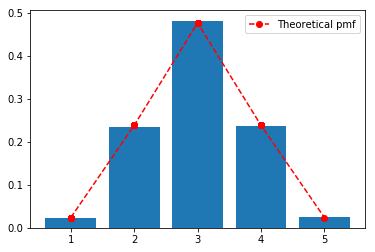

In [10]:
def urna(w, b, n):
    """
    w: number of white balls
    b: number of black balls
    n: sample size (without replacement)
    returns a string containing the sample of size n
    """
    bolas = 'w' * w + 'b' * b
    bL = [b for b in bolas]
    np.random.shuffle(bL)
    return ''.join(bL)[:n]


def sim_urna(w, b, n, rep):
    """
    Simulates urna sampling for a given number of
    repetitions (rep)
    returns a sequence containing the counts for the white balls
    """
    R = []
    for i in range(rep):
        R.append(urna(w, b, n).count('w'))

    return R

RVS = sim_urna(6, 4, 5, 10000)

# Plots RVS frequencies
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

# Plot pmf
from scipy.stats import hypergeom
x = np.linspace(min(RVS), max(RVS), dtype='int')  # variable range
px = hypergeom.pmf(x, 10, 6, 5)
plt.plot(x, px, '--ro')
plt.legend(['Theoretical pmf'])

plt.show()

**Homework 1:** For all the **discrete distributions** above, use the scipy.stats function to generate a random variate vector, and plot the theoretical pmf to compare with the generated frequencies. You can go to the wiki page of each distribution to replicate for the **parameters** given in the examples. Or go to the slides: https://drive.google.com/file/d/0B-dmEvN59Z2ZOF9US1RxcVRyQnc/view, and try the examples and excercises.
1. Generate RVS and plot bar graph with relative frequencies
2. Plot theoretical PMF and compare with bar diagram
3. Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
4. Calculate cumulative frequencies of RVS in point **(1)**
5. Plot theoretical CDF and compare with point **(4)**